Jumlah baris & kolom: (615, 14)
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64
Akurasi: 0.8898305084745762

Classification Report:
               precisi

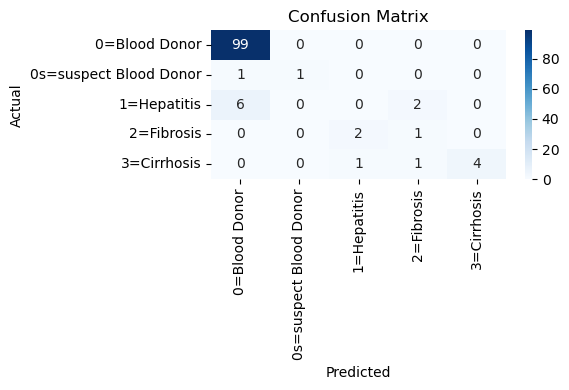

✅ Model disimpan sebagai 'Hepatitis_model.sav'


In [3]:
# --- 1. Import Library ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

# --- 2. Load Dataset ---
df = pd.read_csv("HepatitisCdata.csv")

# --- 3. Cek data awal ---
print("Jumlah baris & kolom:", df.shape)
print(df.head())

# --- 4. Cek missing values ---
print(df.isnull().sum())

# --- 5. Hapus kolom tak perlu & missing value ---
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
df.dropna(inplace=True)

# --- 6. Encode kolom 'Sex' (m/f) menjadi numerik (1/0) ---
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

# --- 7. Encode kolom 'Category' sebagai label ---
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# --- 8. Pisahkan fitur & label ---
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
        'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
y = df['Category_encoded']

# --- 9. Split data (train & test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --- 10. Train model klasifikasi ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 11. Evaluasi model ---
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 12. Confusion Matrix ---
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- 13. Simpan model ke file .sav ---
with open('Hepatitis_model.sav', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model disimpan sebagai 'Hepatitis_model.sav'")
